In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [100]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/LG.csv')

In [101]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,3/4/2019,71200,70800,71800,70800
1,3/5/2019,71300,70900,72000,70300
2,3/6/2019,74400,72300,74600,72300
3,3/7/2019,75100,75200,76700,74200
4,3/8/2019,73700,75000,76100,73300
...,...,...,...,...,...
1502,5/21/2024,96500,97000,97800,96000
1503,5/22/2024,95300,96700,96900,95100
1504,5/23/2024,95400,96000,97300,95400
1505,5/24/2024,94100,94500,94800,93800


In [102]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 805.9355339403974
Mean Squared Error (MSE): 1260324.2382230442
R-squared (R2): 0.9888624389335644


**Dự đoán 30 ngày tiếp theo**

In [104]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

93646.016
4
1 day input [95500.       91700.       93646.015625]
1 day output [92877.65]
2 day input [91700.        93646.015625  92877.6484375]
2 day output [93733.96]
3 day input [93646.015625  92877.6484375 93733.9609375]
3 day output [92924.36]
4 day input [92877.6484375 93733.9609375 92924.359375 ]
4 day output [93733.12]
5 day input [93733.9609375 92924.359375  93733.1171875]
5 day output [92924.36]
6 day input [92924.359375  93733.1171875 92924.359375 ]
6 day output [93733.12]
7 day input [93733.1171875 92924.359375  93733.1171875]
7 day output [92924.36]
8 day input [92924.359375  93733.1171875 92924.359375 ]
8 day output [93733.12]
9 day input [93733.1171875 92924.359375  93733.1171875]
9 day output [92924.36]
10 day input [92924.359375  93733.1171875 92924.359375 ]
10 day output [93733.12]
11 day input [93733.1171875 92924.359375  93733.1171875]
11 day output [92924.36]
12 day input [92924.359375  93733.1171875 92924.359375 ]
12 day output [93733.12]
13 day input [93733.11718

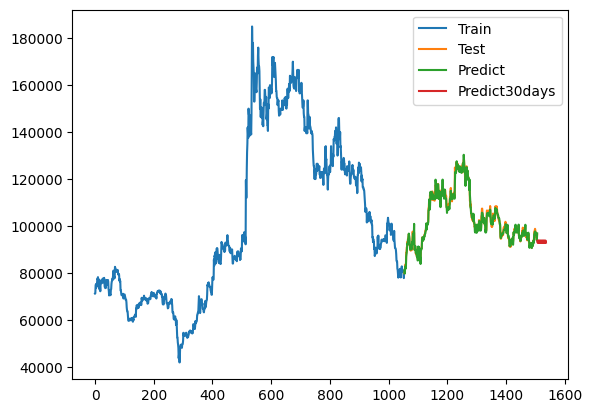

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

**Dự đoán 60 ngày tiếp theo**

In [106]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[:3])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

93646.016
4
1 day input [91700 95500 91700]
1 day output [93646.016]
2 day input [95500.       91700.       93646.015625]
2 day output [92877.65]
3 day input [91700.       93646.015625 93646.015625]
3 day output [93871.37]
4 day input [93646.015625  93646.015625  92877.6484375]
4 day output [93630.68]
5 day input [93646.015625  92877.6484375 93871.3671875]
5 day output [92924.36]
6 day input [92877.6484375 93871.3671875 93630.6796875]
6 day output [93871.95]
7 day input [93871.3671875 93630.6796875 92924.359375 ]
7 day output [93690.164]
8 day input [93630.6796875 92924.359375  93871.953125 ]
8 day output [92924.36]
9 day input [92924.359375  93871.953125  93690.1640625]
9 day output [93871.95]
10 day input [93871.953125  93690.1640625 92924.359375 ]
10 day output [93690.164]
11 day input [93690.1640625 92924.359375  93871.953125 ]
11 day output [92924.36]
12 day input [92924.359375  93871.953125  93690.1640625]
12 day output [93871.95]
13 day input [93871.953125  93690.1640625 92924.3

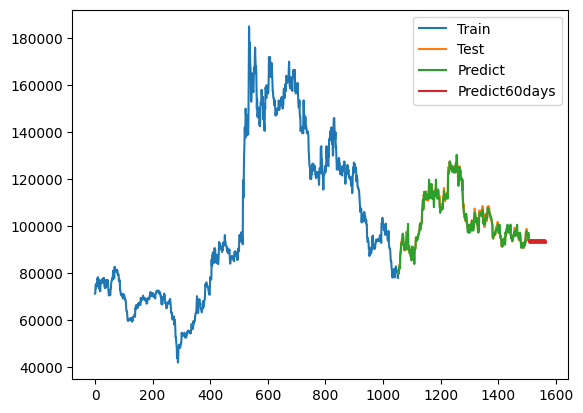

In [107]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

**Dự đoán 90 ngày tiếp theo**

In [108]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

93646.016
4
1 day input [95500.       91700.       93646.015625]
1 day output [92877.65]
2 day input [91700.        93646.015625  92877.6484375]
2 day output [93733.96]
3 day input [93646.015625  92877.6484375 93733.9609375]
3 day output [92924.36]
4 day input [92877.6484375 93733.9609375 92924.359375 ]
4 day output [93733.12]
5 day input [93733.9609375 92924.359375  93733.1171875]
5 day output [92924.36]
6 day input [92924.359375  93733.1171875 92924.359375 ]
6 day output [93733.12]
7 day input [93733.1171875 92924.359375  93733.1171875]
7 day output [92924.36]
8 day input [92924.359375  93733.1171875 92924.359375 ]
8 day output [93733.12]
9 day input [93733.1171875 92924.359375  93733.1171875]
9 day output [92924.36]
10 day input [92924.359375  93733.1171875 92924.359375 ]
10 day output [93733.12]
11 day input [93733.1171875 92924.359375  93733.1171875]
11 day output [92924.36]
12 day input [92924.359375  93733.1171875 92924.359375 ]
12 day output [93733.12]
13 day input [93733.11718

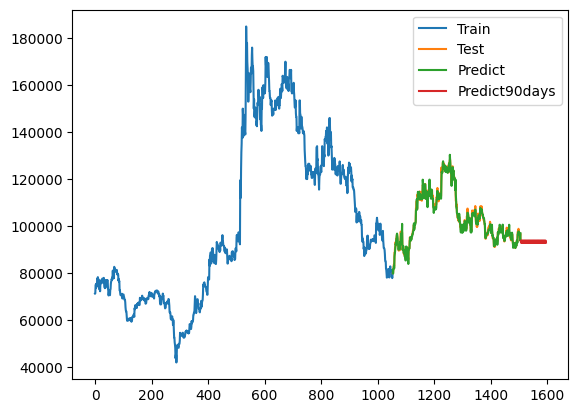

In [109]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()